# Import Libraries

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesRegressor

In [127]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# import data

In [128]:
data = pd.read_csv('gld_price_data.csv')

In [129]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# Exploratory Data Analysis

In [130]:
data.shape

(2290, 6)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [132]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [133]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [134]:
data.duplicated().sum()

0

In [135]:
data.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

In [136]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Visualization Analysis

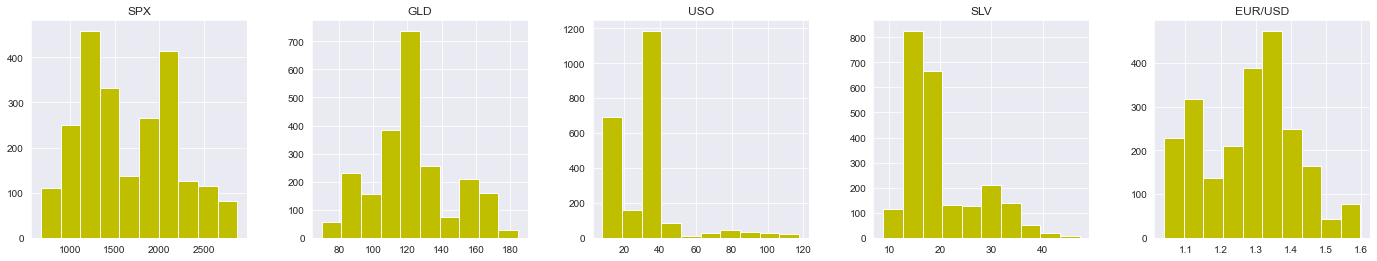

In [137]:
data.hist(figsize=(24,4), layout=(1,5), color="y");

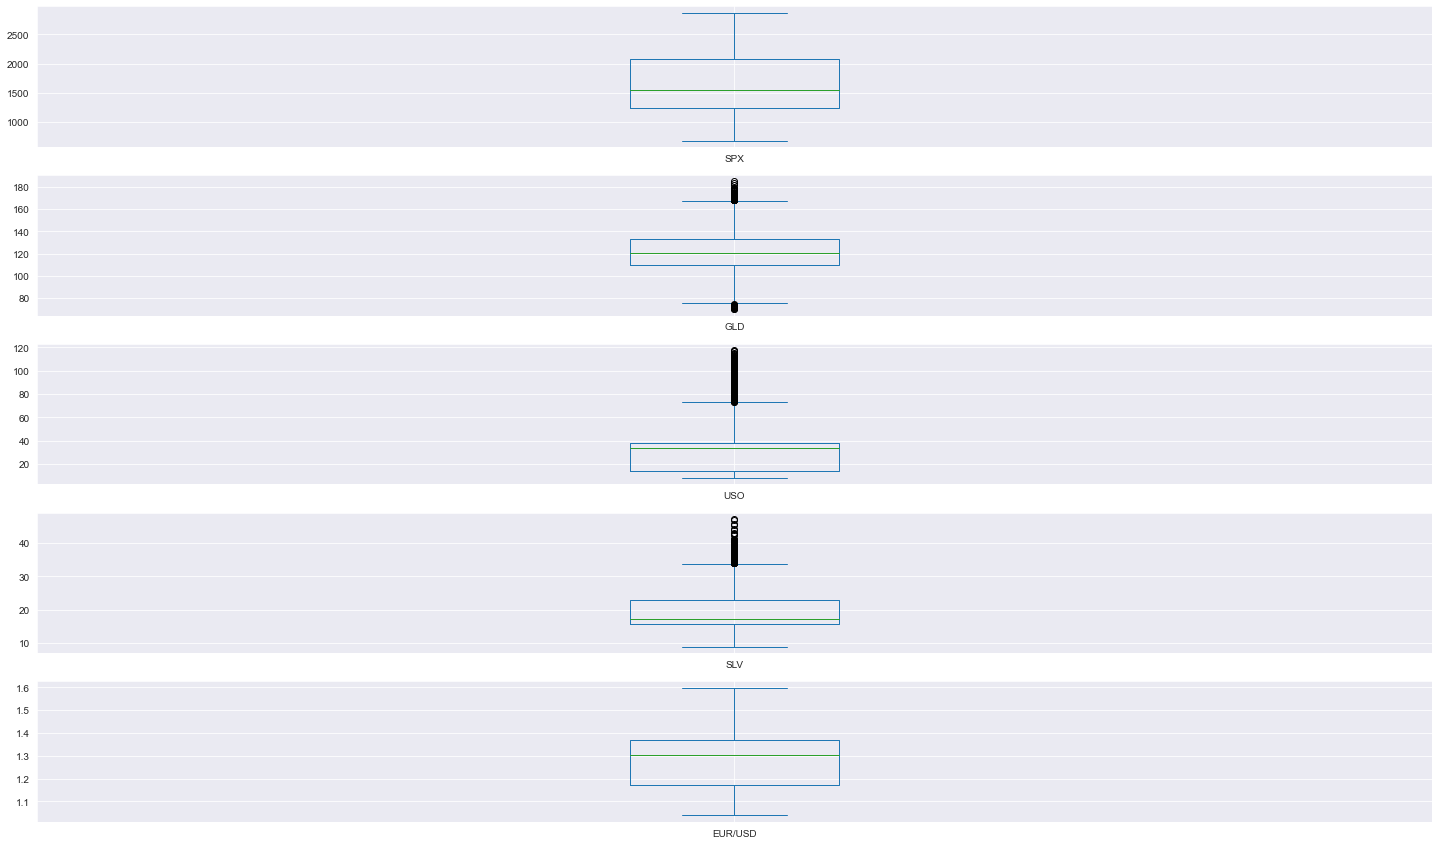

In [138]:
data.plot(kind="box", subplots=True, layout=(5,1), figsize=(25,15),sharex=False, sharey=False);

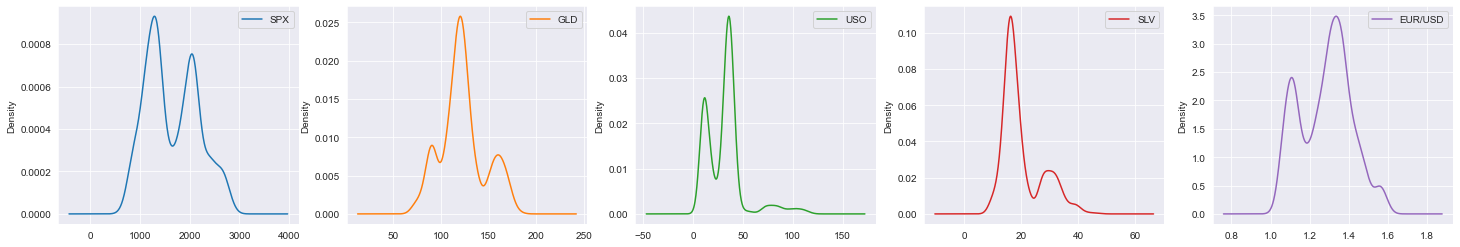

In [139]:
data.plot(kind="kde", subplots=True, layout=(1,5), figsize=(25,4),sharex=False, sharey=False);

<AxesSubplot:xlabel='USO', ylabel='GLD'>

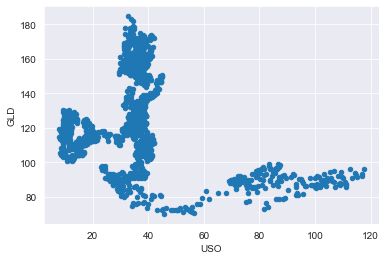

In [140]:
data.plot(kind='scatter', x='USO', y='GLD')


<AxesSubplot:xlabel='SLV', ylabel='GLD'>

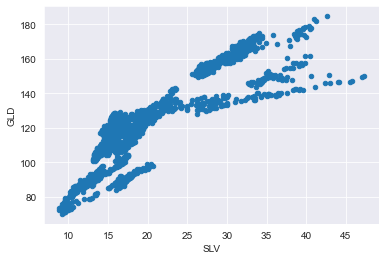

In [141]:
data.plot(kind='scatter', x='SLV', y='GLD')


<AxesSubplot:xlabel='SPX', ylabel='GLD'>

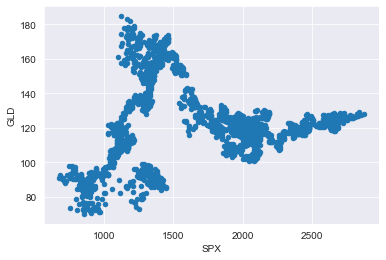

In [142]:
data.plot(kind='scatter', x='SPX', y='GLD')


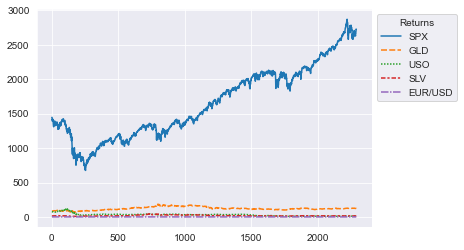

In [143]:
sns.lineplot(data=data)
plt.legend(title='Returns', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

In [144]:
d1 = data.copy()
d1['MASPX'] = d1['SPX'].rolling(200).mean()
d1['MAGLD'] = d1['GLD'].rolling(200).mean()
d1['MAUSO'] = d1['USO'].rolling(200).mean()
d1['MASLV'] = d1['SLV'].rolling(200).mean()
d1['MAEUR/USD'] = d1['EUR/USD'].rolling(200).mean()

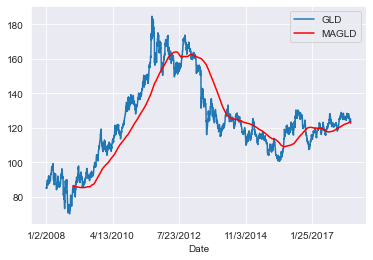

In [145]:
ax = plt.gca()

d1.plot(kind='line',x='Date',y='GLD',ax=ax)
d1.plot(kind='line',x='Date',y='MAGLD', color='red', ax=ax)

plt.show()

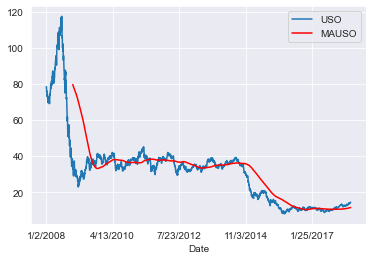

In [146]:
ax = plt.gca()

d1.plot(kind='line',x='Date',y='USO',ax=ax)
d1.plot(kind='line',x='Date',y='MAUSO', color='red', ax=ax)

plt.show()

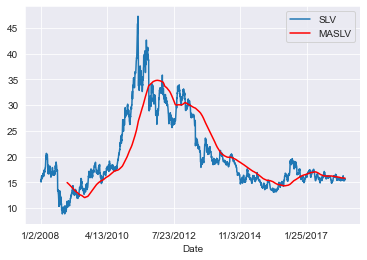

In [147]:
ax = plt.gca()

d1.plot(kind='line',x='Date',y='SLV',ax=ax)
d1.plot(kind='line',x='Date',y='MASLV', color='red', ax=ax)

plt.show()

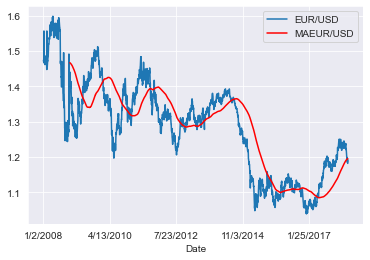

In [148]:
ax = plt.gca()

d1.plot(kind='line',x='Date',y='EUR/USD',ax=ax)
d1.plot(kind='line',x='Date',y='MAEUR/USD', color='red', ax=ax)

plt.show()

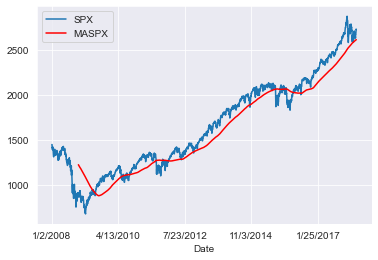

In [149]:
ax = plt.gca()

d1.plot(kind='line',x='Date',y='SPX',ax=ax)
d1.plot(kind='line',x='Date',y='MASPX', color='red', ax=ax)

plt.show()

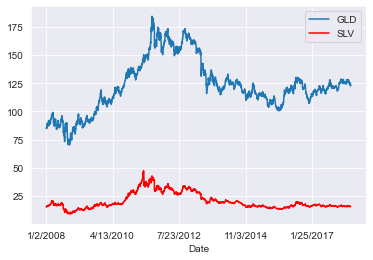

In [150]:
ax = plt.gca()

data.plot(kind='line',x='Date',y='GLD',ax=ax)
data.plot(kind='line',x='Date',y='SLV', color='red', ax=ax)

plt.show()

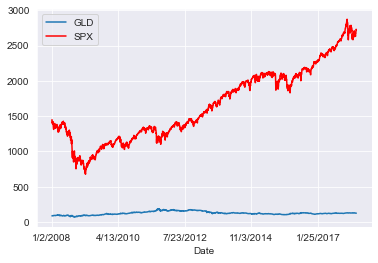

In [151]:
ax = plt.gca()

data.plot(kind='line',x='Date',y='GLD',ax=ax)
data.plot(kind='line',x='Date',y='SPX', color='red', ax=ax)

plt.show()

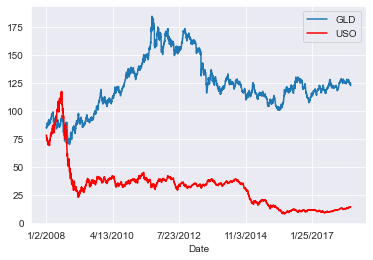

In [152]:
ax = plt.gca()

data.plot(kind='line',x='Date',y='GLD',ax=ax)
data.plot(kind='line',x='Date',y='USO', color='red', ax=ax)

plt.show()

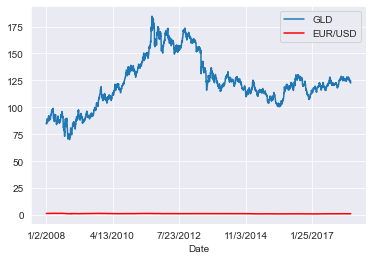

In [153]:
ax = plt.gca()

data.plot(kind='line',x='Date',y='GLD',ax=ax)
data.plot(kind='line',x='Date',y='EUR/USD', color='red', ax=ax)

plt.show()

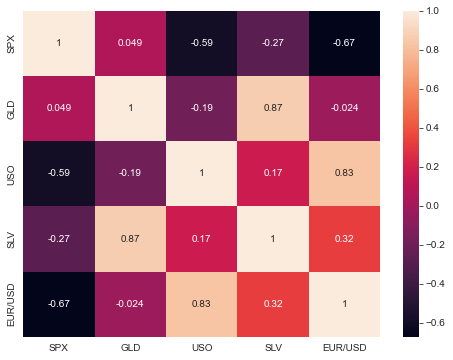

In [154]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True);

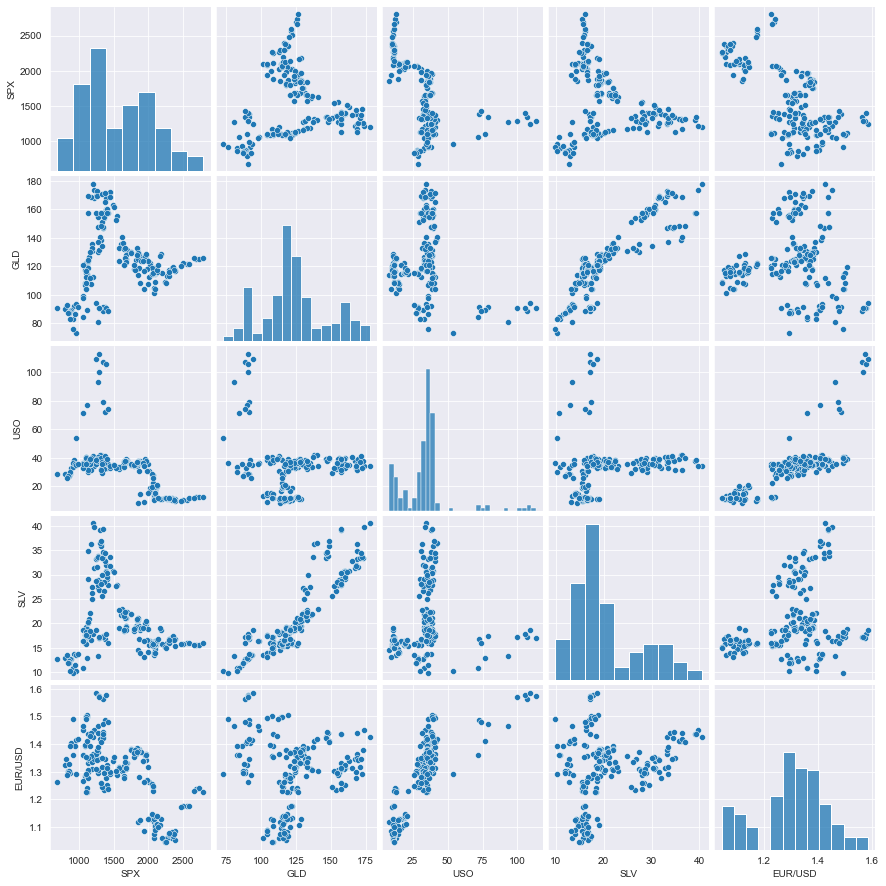

In [155]:
sns.pairplot(data.sample(n=200));

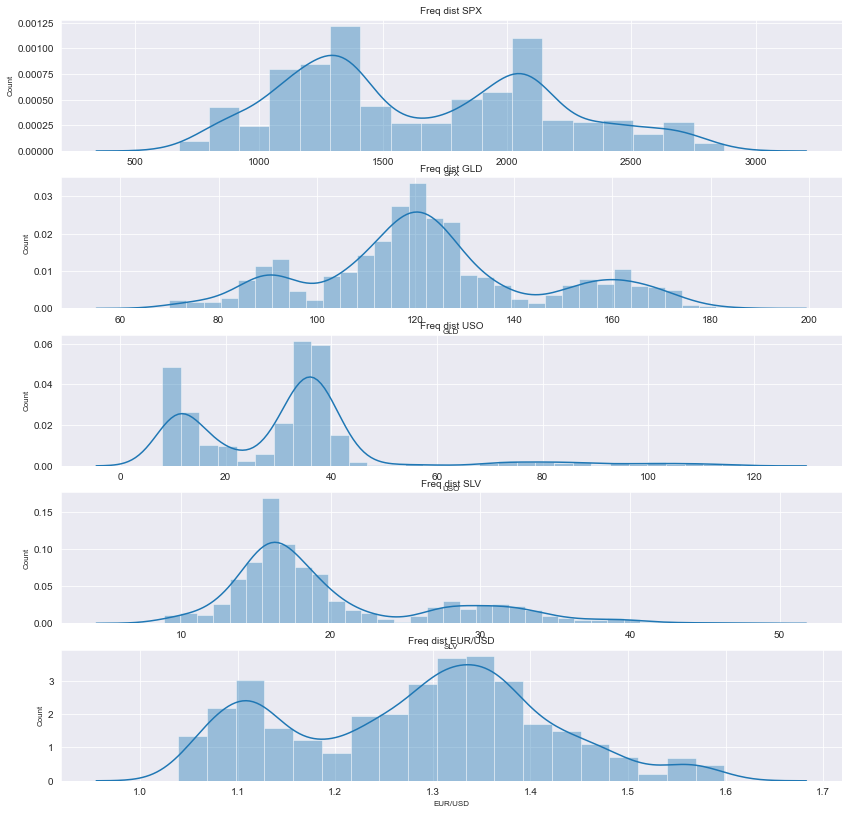

In [156]:
col_names = ['SPX','GLD', 'USO', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(14,14))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

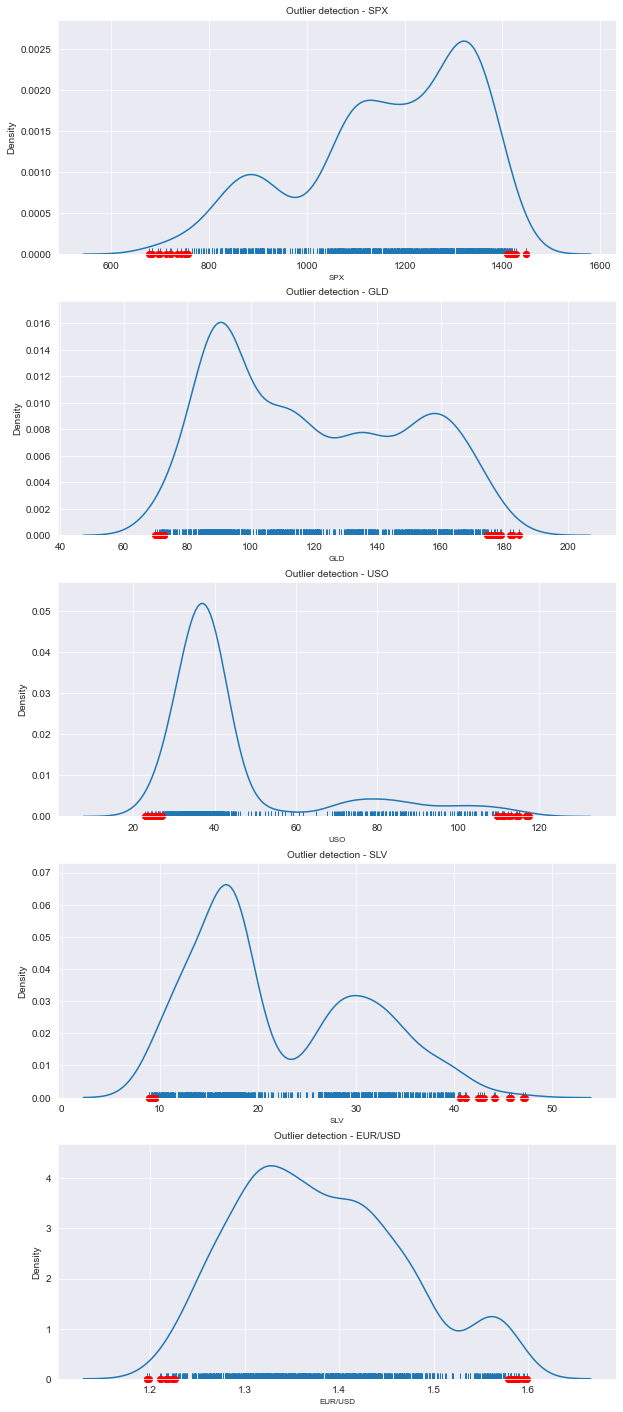

In [157]:
def percentile_based_outlier(data, threshold=97):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['SPX','GLD', 'USO', 'SLV', 'EUR/USD']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):
    x = data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Preprocessing


In [158]:
data_preprocessed = data.copy()

In [159]:
date = ['Date']
num_columns = data_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'GLD'

In [160]:
num_columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [161]:
data_preprocessed['Date'] = pd.to_datetime(data_preprocessed['Date'])

In [162]:
data_preprocessed.reset_index(drop=True, inplace=True)

In [163]:
data_preprocessed.drop(['Date'], axis=1, inplace=True)

In [164]:
## train test split

X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [165]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
## Feature Scaling
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Feature Selection

In [167]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=3)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

# BaseLine Modeling

In [168]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [170]:
lr = LinearRegression().fit(X_train_scaled, y_train)
y_lr = lr.predict(X_test_scaled)

In [171]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)

In [172]:
dt = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_dt = dt.predict(X_test_scaled)

In [173]:
gb = GradientBoostingRegressor().fit(X_train_scaled,y_train)
y_gb = gb.predict(X_test_scaled)

In [174]:
xgb = XGBRegressor().fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)

In [175]:
rf = RandomForestRegressor().fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

#### Model Evaluation

In [176]:
lr_score = metrics.r2_score(y_test, y_lr)
knn_score = metrics.r2_score(y_test, y_knn)
dt_score = metrics.r2_score(y_test, y_dt)
gb_score = metrics.r2_score(y_test, y_gb)
xgb_score = metrics.r2_score(y_test, y_xgb)
rf_score = metrics.r2_score(y_test, y_rf)

In [177]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "Accuracy", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score)
print("-"*50)

print("-"*50)
print("| Gradient Boosting: ", gb_score)
print("-"*50)

print("-"*50)
print("| XGBoost: ", xgb_score)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score)
print("-"*50)


******************** Accuracy ********************
--------------------------------------------------
| Linear Regression:  0.8938001456973091
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  0.9808587941859904
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  0.9740631024982432
--------------------------------------------------
--------------------------------------------------
| Gradient Boosting:  0.9718809059606133
--------------------------------------------------
--------------------------------------------------
| XGBoost:  0.9781091890313759
--------------------------------------------------
--------------------------------------------------
| Random Forest:  0.9830688530450139
--------------------------------------------------
